In [17]:
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [18]:
script_dir = os.getcwd()
user = os.getenv("USER") 
if user == "jon":
    script_dir = "/mnt/b/Xray"

results_dir = f"{script_dir}/results"

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#detailed_results_path = f"{results_dir}/detailed_model_results_20241126_210435.csv"
#summary_results_path = f"{results_dir}/summary_model_results_20241126_210511.csv"
detailed_results_path = f"{results_dir}/detailed_model_results.csv"

In [19]:
def plot_combined_radar_chart(results_df):
    pathologies = results_df["Pathology"].unique()
    num_pathologies = len(pathologies)

    # Create angle for each pathology
    angles = np.linspace(0, 2 * np.pi, num_pathologies, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Prepare figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per pathology and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(pathologies, fontsize=10)

    # Draw y-labels
    ax.set_rscale("linear")
    ax.set_rlabel_position(0)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    ax.set_ylim(0, 1)

    # Colors for each model
    colors = plt.cm.tab20.colors

    # Plot test AUCs for each model
    for i, model_name in enumerate(results_df["Model"].unique()):
        model_results = results_df[results_df["Model"] == model_name]
        avg_auc_per_pathology = model_results.groupby("Pathology")["Test AUC"].mean()

        test_aucs = avg_auc_per_pathology.tolist()
        test_aucs += test_aucs[:1]  # Complete the loop

        ax.plot(angles, test_aucs, label=model_name, linestyle='-', color=colors[i % len(colors)])
        ax.fill(angles, test_aucs, color=colors[i % len(colors)], alpha=0.1)

    # Add legend and title
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=9)
    plt.title("Combined Radar Chart for Test AUCs of All Models", size=15, y=1.1)
    plt.show()

In [20]:
def plot_radar_chart(model_name, results_df, runs_per_model=5):
    pathologies = results_df["Pathology"].unique()
    num_pathologies = len(pathologies)

    # Prepare data for the specified model
    model_results = results_df[results_df["Model"] == model_name]
    avg_auc_per_pathology = model_results.groupby("Pathology")[["Validation AUC", "Test AUC"]].mean()

    # Create angle for each pathology
    angles = np.linspace(0, 2 * np.pi, num_pathologies, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Prepare data for radar chart
    validation_aucs = avg_auc_per_pathology["Validation AUC"].tolist()
    test_aucs = avg_auc_per_pathology["Test AUC"].tolist()
    validation_aucs += validation_aucs[:1]  # Complete the loop
    test_aucs += test_aucs[:1]

    # Start the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per pathology and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(pathologies, fontsize=10)

    # Draw y-labels
    ax.set_rscale("linear")
    ax.set_rlabel_position(0)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    ax.set_ylim(0, 1)

    # Plot data
    ax.plot(angles, validation_aucs, label="Validation AUC", linestyle='--', color="blue")
    ax.fill(angles, validation_aucs, color="blue", alpha=0.1)

    ax.plot(angles, test_aucs, label="Test AUC", linestyle='-', color="orange")
    ax.fill(angles, test_aucs, color="orange", alpha=0.1)

    # Add legend and title
    plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
    plt.title(f"Radar Chart for Model: {model_name}", size=15, y=1.1)
    plt.show()

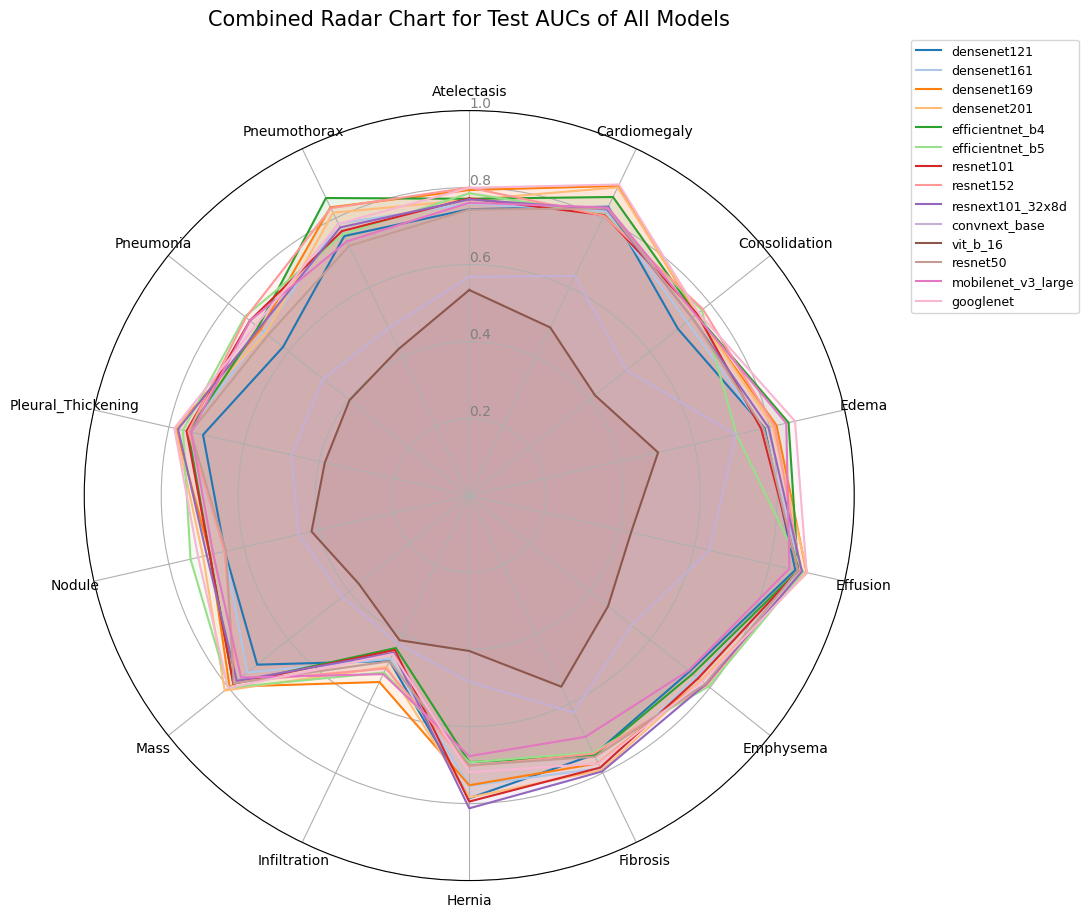

In [21]:
results_df = pd.read_csv(detailed_results_path)


plot_combined_radar_chart(results_df)

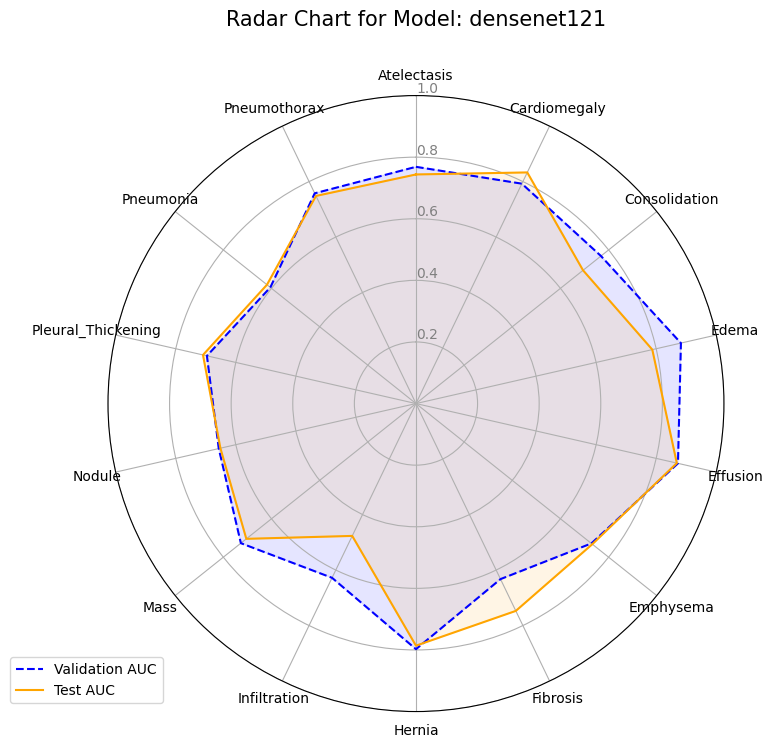

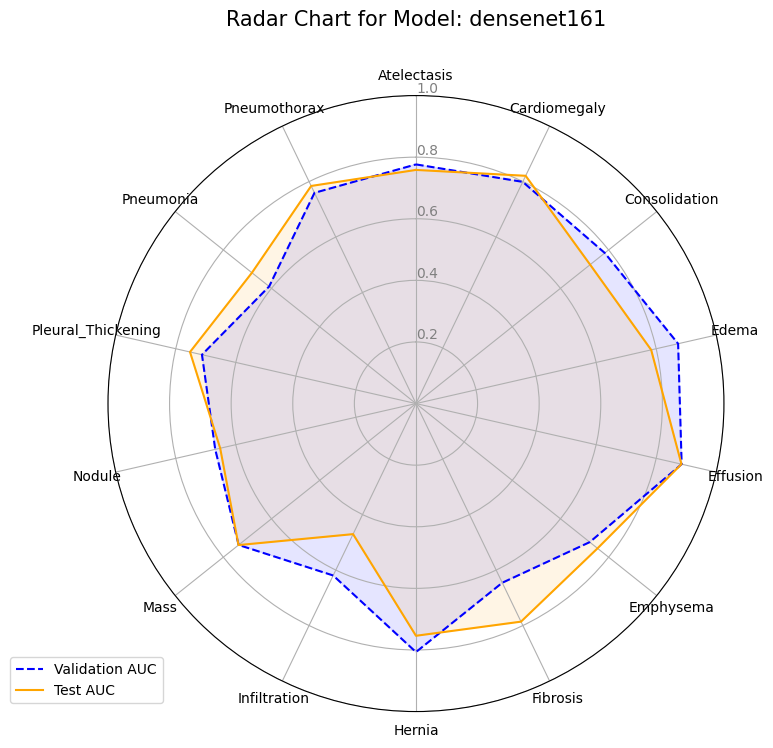

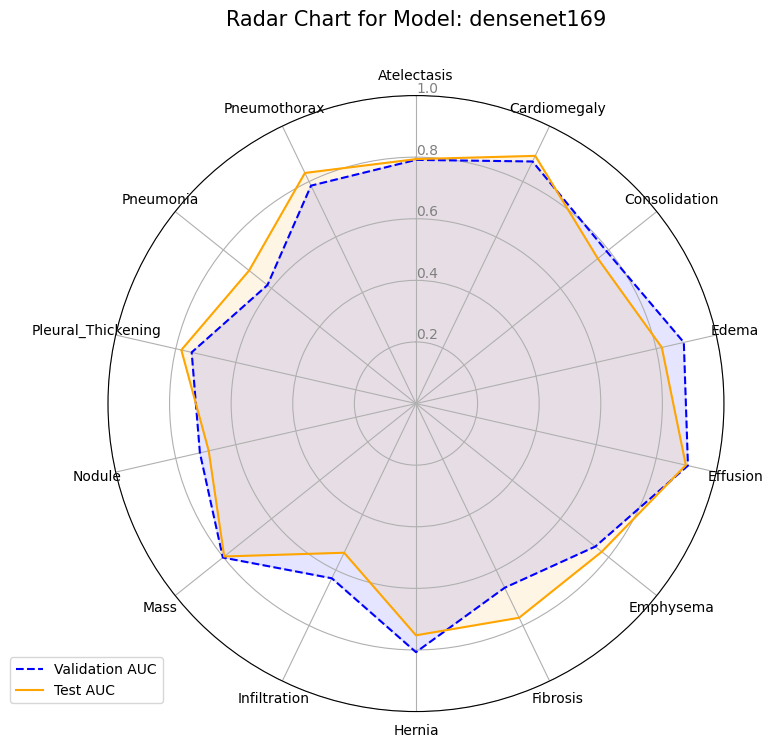

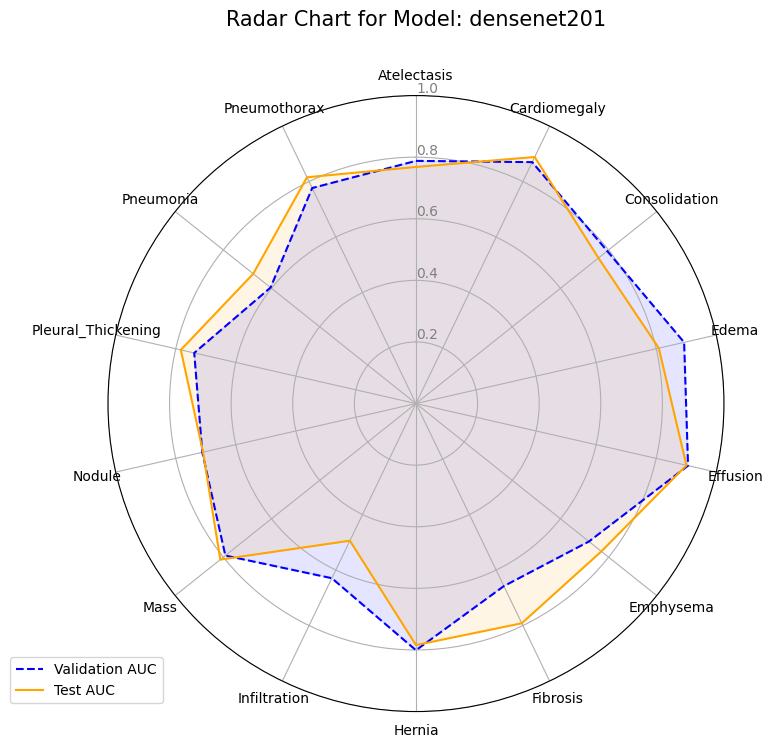

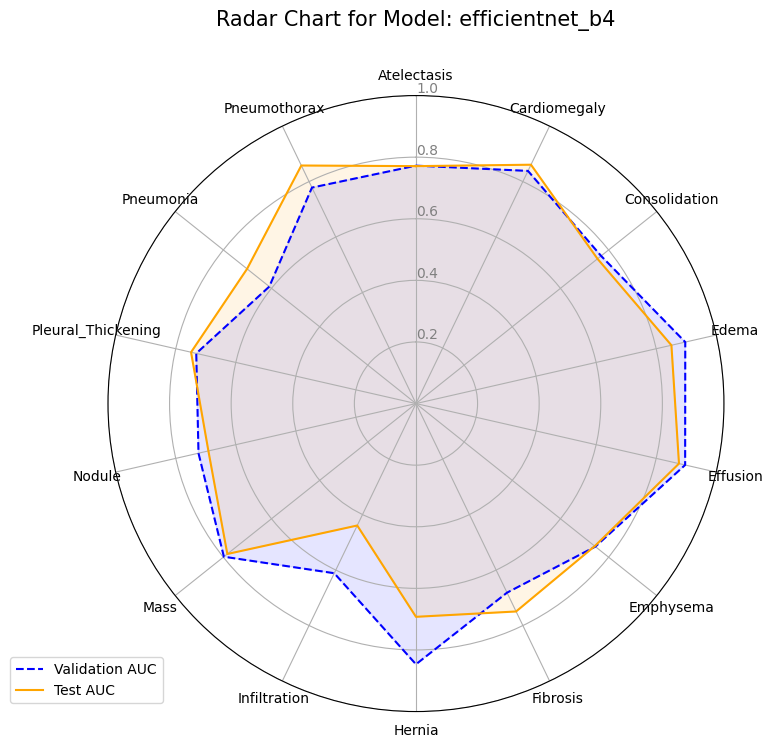

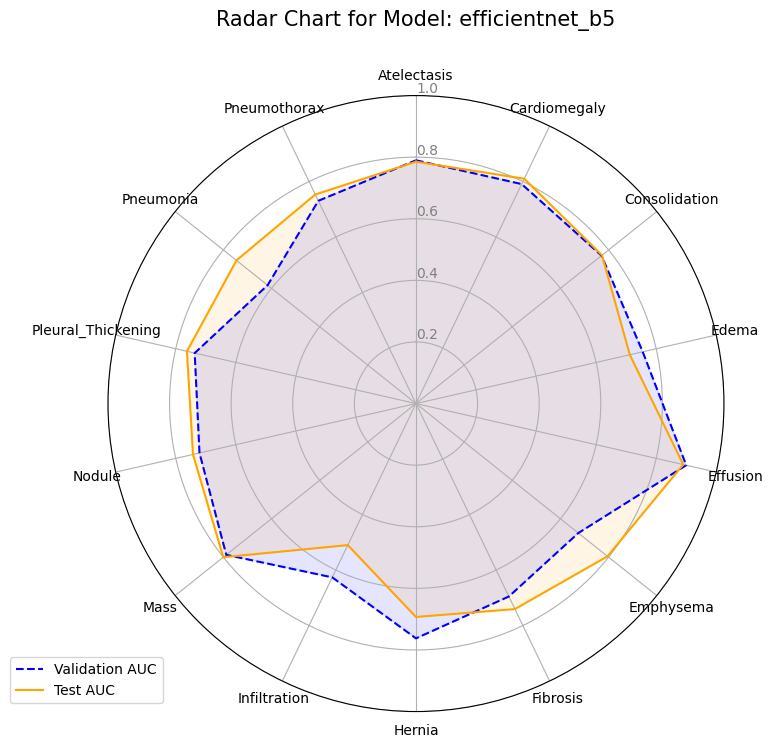

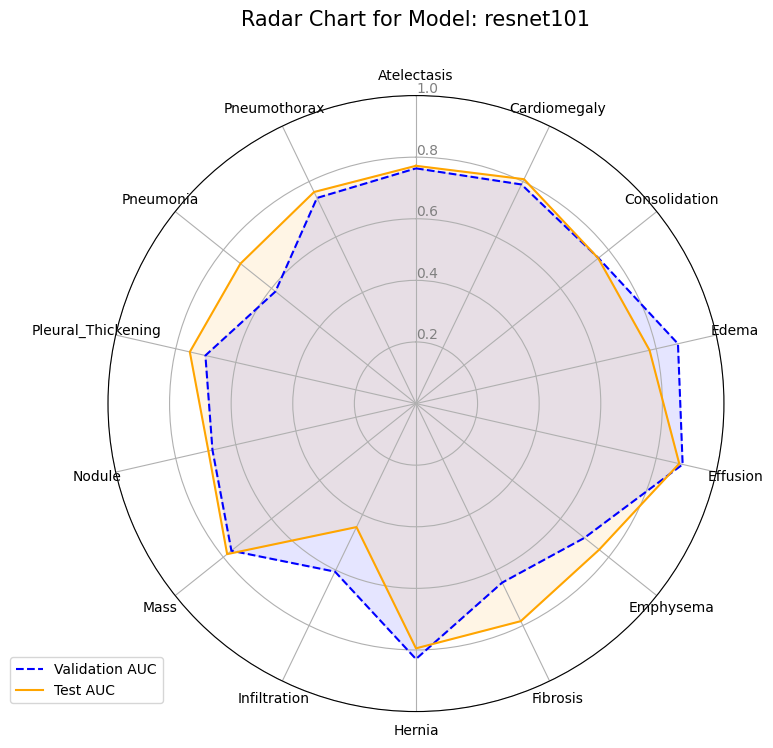

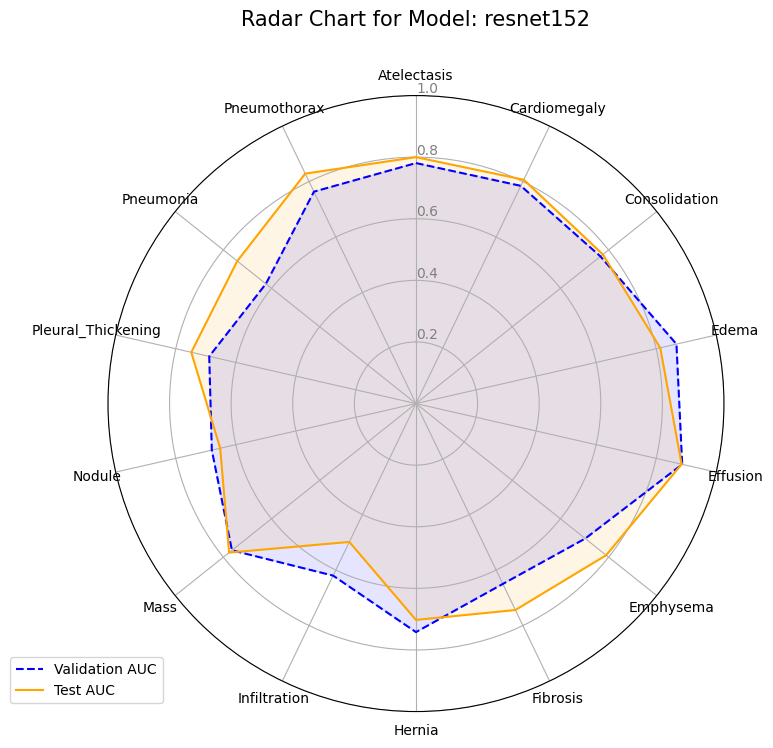

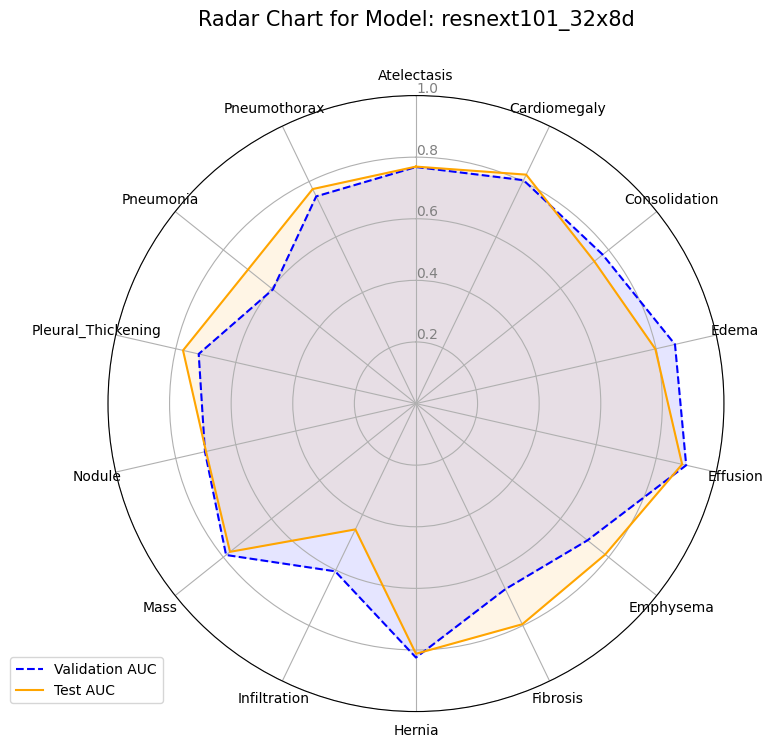

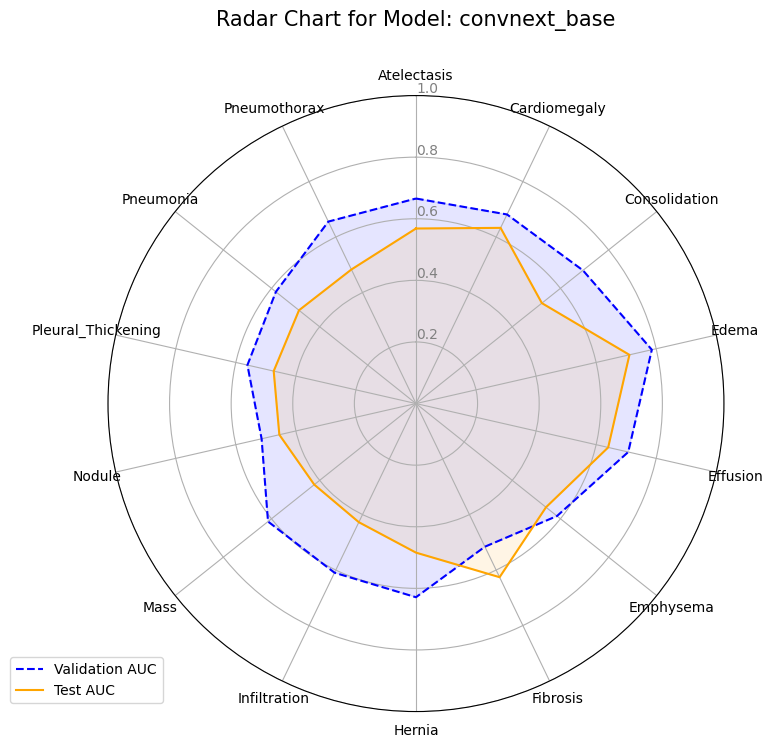

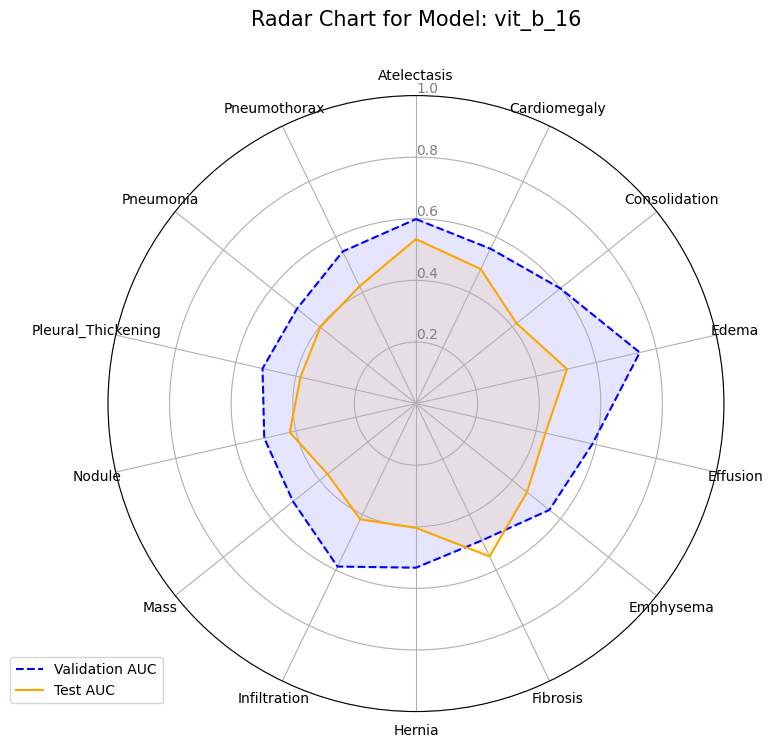

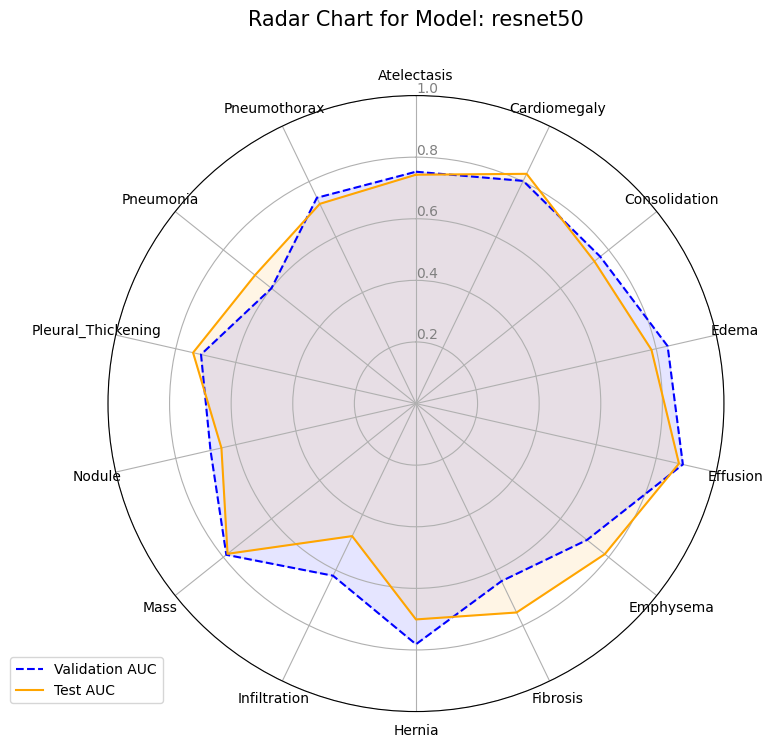

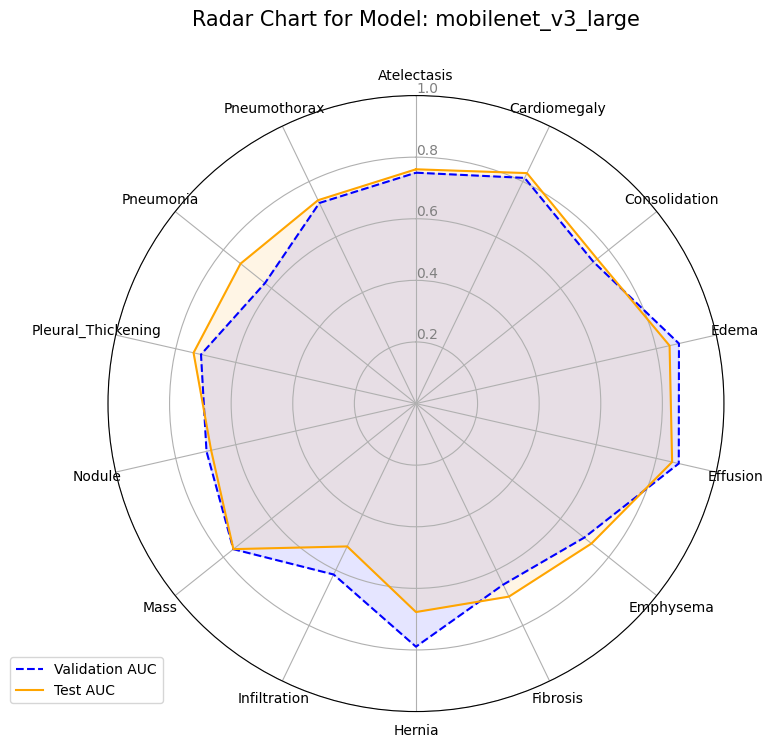

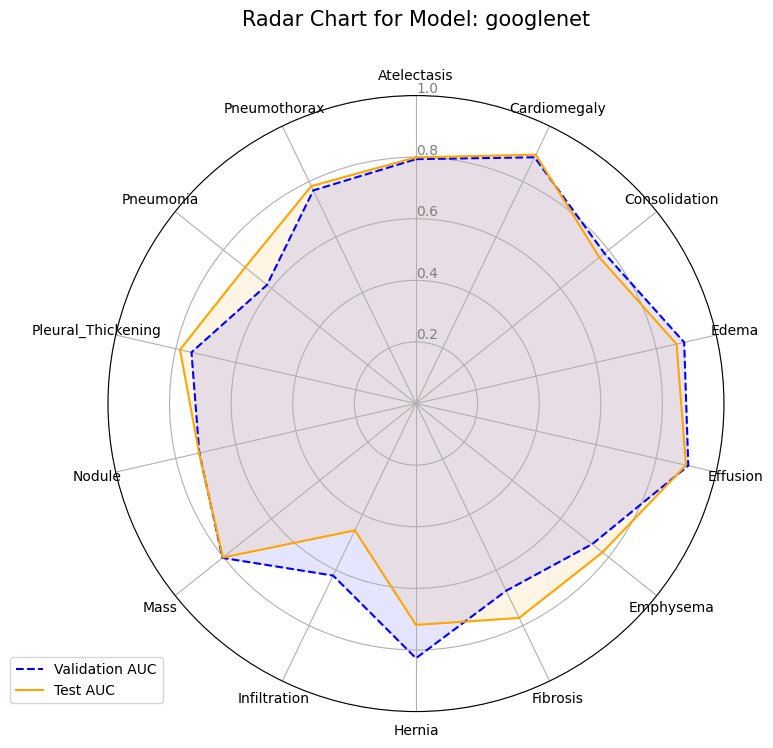

In [22]:
# Generate radar chart for each model
for model_name in results_df["Model"].unique():
    plot_radar_chart(model_name, results_df)